# A random walk on the Heisenberg group

Fix an integer $M$ and consider the Heisenberg group with coefficients in $\mathbb{Z}/M \mathbb{Z}$:
$$ \mathbb{H}_M
   =
   \left\{
   \quad
   \begin{pmatrix}
   1 & x & z \\
   0 & 1 & y \\
   0 & 0 & 1
   \end{pmatrix}
   \ | \ 
   x, y, z \in \mathbb{Z}/M \mathbb{Z}
   \quad
   \right\} \ .
$$

We build the right-invariant random walk:
$$ G_{n+1} = g_{n+1} G_n \ ,$$
where the family $\left( g_n \ ; \ n \in \mathbb{N} \right)$ of increments are iid. If we use the notation:
$$ G_n = \left[ X_n, Y_n, Z_n \right]$$
$$ g_n = \left[ x_n, y_n, z_n \right]$$
then
$$ X_n = \sum_{k=0}^n x_k $$
$$ Y_n = \sum_{k=0}^n y_k $$
$$ Z_{n+1} = Z_n + x_{n+1} Y_n $$

## I. Trajectories

The following code samples a full trajectory, showing that if $X$ and $Y$ are standard random walks, the process $Z$ is more wildly behaved.

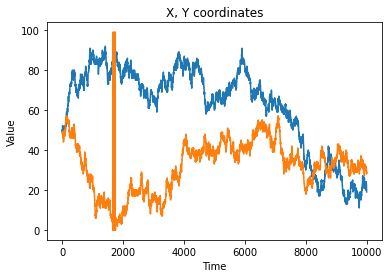

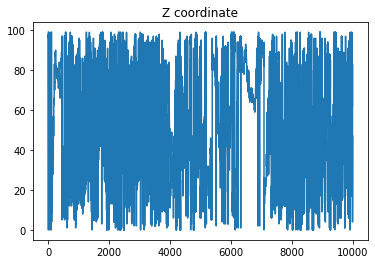

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
increments = [
    [ 1, 0, 0],
    [-1, 0, 0],
    [ 0, 1, 0],
    [ 0,-1, 0],
    [ 0, 0, 0],
    [ 0, 0, 0]
]
increments = np.array( increments )

def sample_increments(count):
    indices = np.random.randint(0, 6, size=count)
    return increments[indices, :]

def sample_random_walk(length):
    increments = sample_increments(length)
    x = increments[:, 0]
    y = increments[:, 1]
    X = np.cumsum( x )
    Y = np.cumsum( y )
    Z = np.copy( Y )
    Z[1:] = np.cumsum( x[1:]*Y[0:-1] )
    return X, Y, Z
    
X, Y, Z = sample_random_walk(10000)
plt.plot( (X-0.5*M)%M, label="x")
plt.plot( (Y-0.5*M)%M, label="y")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('X, Y coordinates')
plt.show()

plt.plot(Z%M, label="z")
plt.title("Z coordinate")
plt.show()


## II. Equilibrium

The following code analyzes the convergence to equilibrium by sampling $\textrm{batch_size}$ random walks on $\mathbb{H}_M$, and plotting histograms of the coordinates.

One has a convergence to equilibrium in $O(M^2)$ for $X$ and $Y$. However the convergence to equilibrium for $Z$ is expected to be in $O(M)$.

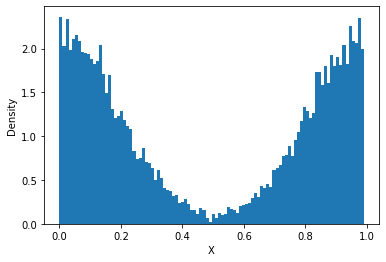

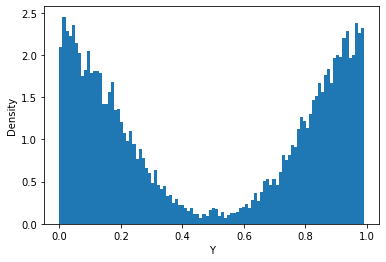

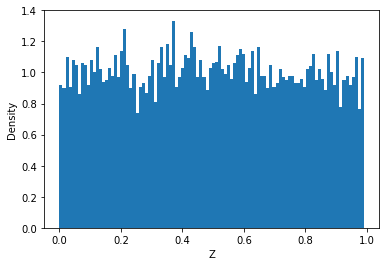

In [3]:
# Monte-Carlo
batch_size = 10000
M          = 100
length     = 10*M        #Vitesse de convergence de Z en O(M)
#length     = M**2       #Vitesse de convergence de X,Y en O(M^2)
samples    = []
for i in range(batch_size):
    X, Y, Z = sample_random_walk(length)
    samples.append( [X[-1], Y[-1], Z[-1]] )
#
samples = np.array( samples )
samples = (samples % M)/M
labels  = ['X', 'Y', 'Z']
for i in range(3):
    plt.hist( samples[:,i], bins=M, density=True)
    plt.ylabel('Density')
    plt.xlabel(labels[i])
    plt.show()